In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import os

In [ ]:
bankdf = pd.read_csv("bank-additional-full.csv")
bankdf.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
bankdf.shape

(41188, 21)

In [ ]:
bankdf.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


**DATA CLEANING**

**Renaming columns**

In [ ]:
bankdf.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
# rename y to subscription
bankdf.rename(columns={'y': 'subscription'}, inplace=True)

In [ ]:
bankdf.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscription'],
      dtype='object')

**Check for duplicates**

In [ ]:
# check duplicate - this code is only returning the a single entry(1 copy) of the duplicate rows
duplicateRows = bankdf[bankdf.duplicated()]
duplicateRows

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscription
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


There are 12 duplicate rows

In [ ]:
bankdf = bankdf.drop_duplicates()
bankdf.shape

(41176, 21)

**converting datatypes**

In [ ]:
bankdf.dtypes.value_counts()

object     11
int64       5
float64     5
dtype: int64

In [ ]:
obj_columns = []
for i, x in enumerate(bankdf.dtypes.tolist()):
    if x == 'object':
        obj_columns.append(bankdf.columns[i])

for x in obj_columns:
    print(f'Unique Values in {x}:', bankdf[x].nunique())


Unique Values in job: 12
Unique Values in marital: 4
Unique Values in education: 8
Unique Values in default: 3
Unique Values in housing: 3
Unique Values in loan: 3
Unique Values in contact: 2
Unique Values in month: 10
Unique Values in day_of_week: 5
Unique Values in poutcome: 3
Unique Values in subscription: 2


In [ ]:
bankdf['job'] = bankdf['job'].astype('category')
bankdf['marital'] = bankdf['marital'].astype('category')
bankdf['education'] = bankdf['education'].astype('category')
bankdf['default'] = bankdf['default'].astype('category')
bankdf['housing'] = bankdf['housing'].astype('category')
bankdf['loan'] = bankdf['loan'].astype('category')
bankdf['contact'] = bankdf['contact'].astype('category')
bankdf['month'] = bankdf['month'].astype('category')
bankdf['poutcome'] = bankdf['poutcome'].astype('category')
bankdf['subscription'] = bankdf['subscription'].astype('category')
bankdf['day_of_week'] = bankdf['day_of_week'].astype('category') 

**EDA**

In [ ]:
# unique values in job variable
print(bankdf.subscription.nunique())
print(bankdf['subscription'].value_counts())
print(bankdf.subscription.unique())

2
no     36537
yes     4639
Name: subscription, dtype: int64
['no', 'yes']
Categories (2, object): ['no', 'yes']


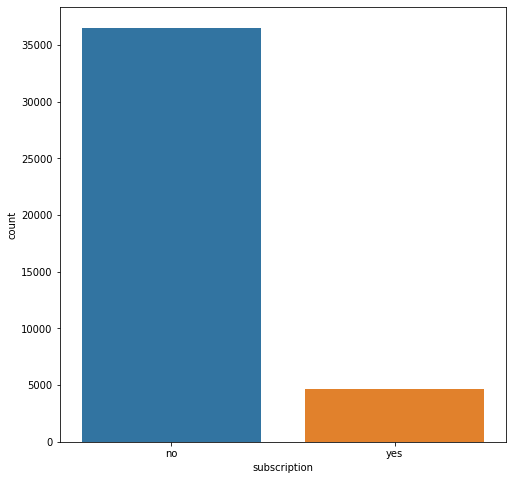

In [ ]:
fig = plt.gcf() 
fig.set_size_inches(8, 8)
sns.countplot(x ='subscription', data = bankdf)
# Show the plot
plt.show()

**Preliminary analysis of dependent variable subsription**


1.   Binary encode to yes-1, no-0
2.   The current data set is very unbalanced; more data fall into the "no" category than the "yes" category.
1.   Count of no- 36548, yes-4640


Analysis of job variable

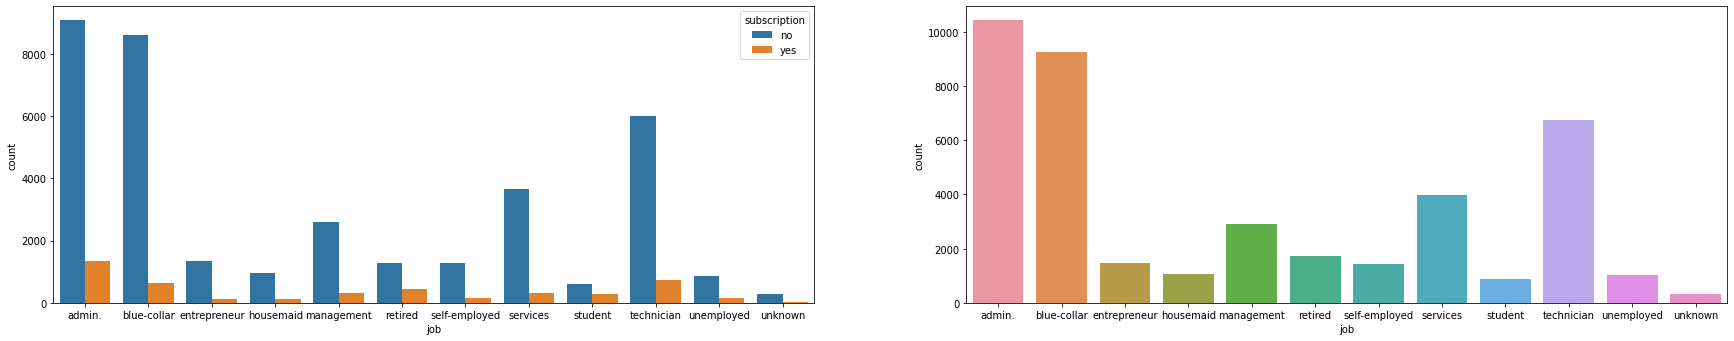

In [ ]:

plt.figure(figsize=[30,12])

plt.subplot(2,2,1)
sns.countplot(x ='job',hue = 'subscription', data = bankdf)
plt.subplot(2,2,2)
sns.countplot(x ='job', data = bankdf)

**Insights:**

**technical -**
*   need to encode the variables
*   unknown profession needs to be handled

**business -**
*   The clients of differnt professions reached through the campaign is not uniform
*   more the 10k clients reached to where of the admin profession
*   people of house maind, retired, unemployed,self employed and student where contacted the least < 2000
*   min age - 17
*   mean age - 38
*   max age - 98
*   maximum subscription was achieved from admin profession, follwed by techician and retired


Analysis of marital variable

In [ ]:
# unique values in job variable
print(bankdf.marital.nunique())
print(bankdf.marital.unique())

4
['married', 'single', 'divorced', 'unknown']
Categories (4, object): ['divorced', 'married', 'single', 'unknown']


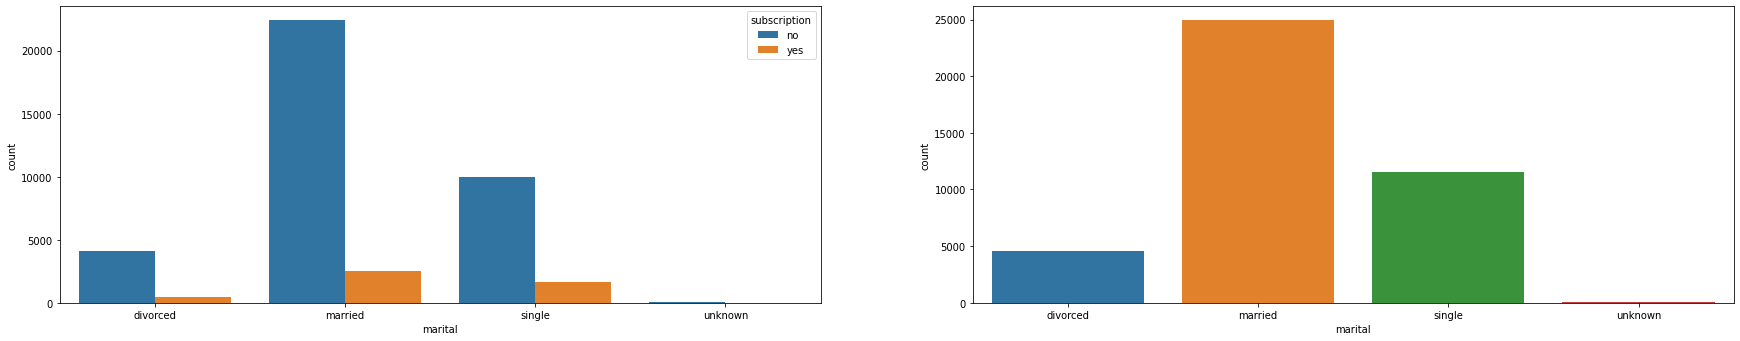

In [ ]:
plt.figure(figsize=[30,12])

plt.subplot(2,2,1)
sns.countplot(x ='marital',hue = 'subscription', data = bankdf)
plt.subplot(2,2,2)
sns.countplot(x ='marital', data = bankdf)

Insight

Technical -
*   Number of unique values – 4
*   Unique values – married, single, divorce, unknown
*   Unknow value is a missing value – need to be handled
*   One hot encoding/ dummy encoding because its nominal data( order irrelevant)

Business –
*   The clients of different marital status reached through the campaign is not uniform
*   Nearly 25k clients contacted where married and Divorcee where least contacted


**Analysis of education variable**

In [ ]:
# unique values in education variable
print(bankdf.education.nunique())
print(bankdf.education.unique())

8
['basic.4y', 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'unknown', 'university.degree', 'illiterate']
Categories (8, object): ['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
                         'professional.course', 'university.degree', 'unknown']


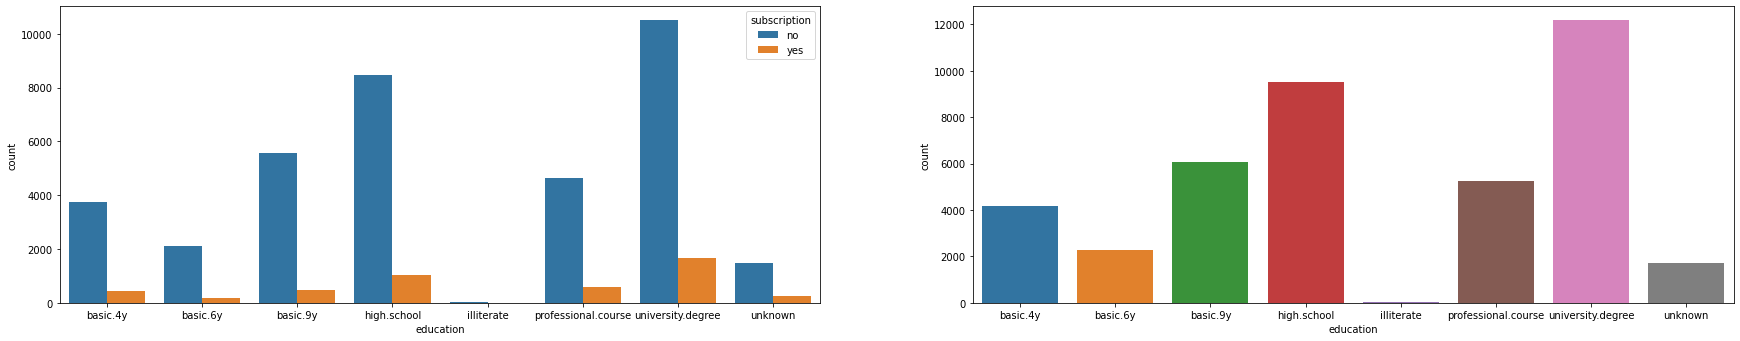

In [ ]:
plt.figure(figsize=[30,12])

plt.subplot(2,2,1)
sns.countplot(x ='education',hue = 'subscription', data = bankdf)
plt.subplot(2,2,2)
sns.countplot(x ='education', data = bankdf)

Insight

Technical -
*   Number of unique values – 8
*   Unique values – basic.4y, high.school, basic.6y, basic.9y, professional.course, unknown, university.degree, illiterate
*   Unknow value is a missing value – need to be handled
*   One hot encoding/ dummy encoding because its nominal data( order irrelevant)

Business –
*   People with university education was contacted most
*   People with basic.6y education was contacted least



analysis of day_of_week variable

In [ ]:
# unique values in day_of_week  variable
print(bankdf.day_of_week .nunique())
print(bankdf.day_of_week .unique())

5
['mon', 'tue', 'wed', 'thu', 'fri']
Categories (5, object): ['fri', 'mon', 'thu', 'tue', 'wed']


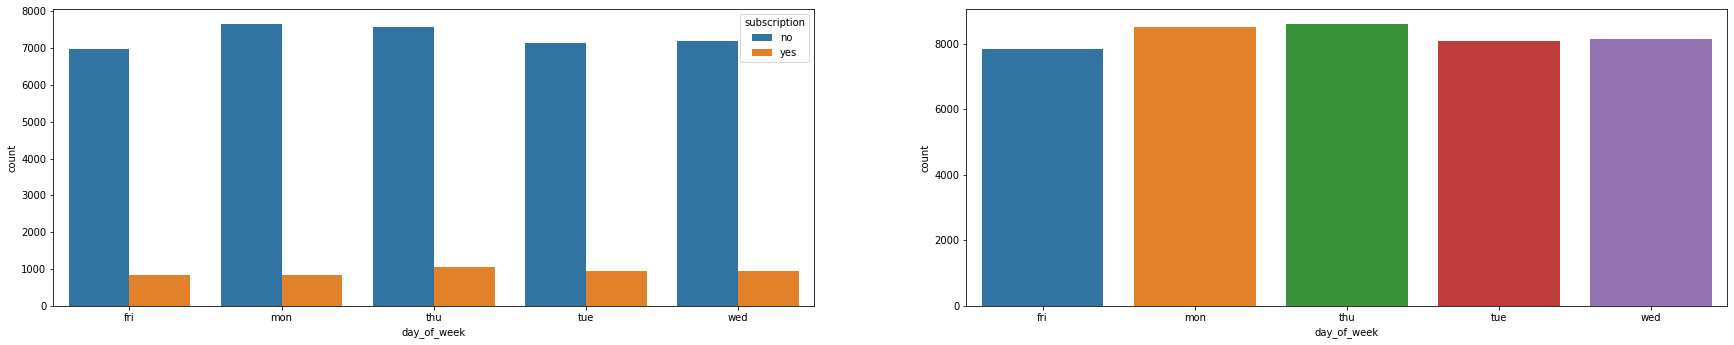

In [ ]:
plt.figure(figsize=[30,12])

plt.subplot(2,2,1)
sns.countplot(x ='day_of_week',hue = 'subscription', data = bankdf)
plt.subplot(2,2,2)
sns.countplot(x ='day_of_week', data = bankdf)


*   Number of unique values – 5
*   Unique values – mon, tue, wed, thu, fri


Business insights –
*   On all the week days around 8000 clients were contacted
*   Nearly 1000 clients subscribed on each day
*   Not much difference made based on the day hence this column can be ommitted



Analysis of default variable

In [ ]:
# unique values in default  variable
print(bankdf.default.nunique())
print(bankdf.default.unique())


3
['no', 'unknown', 'yes']
Categories (3, object): ['no', 'unknown', 'yes']


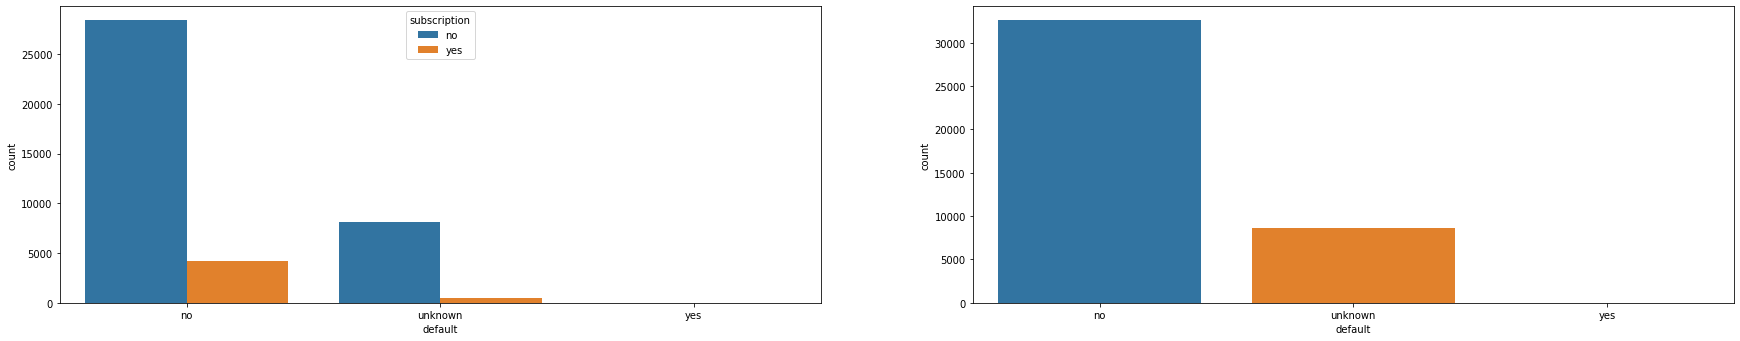

In [ ]:
plt.figure(figsize=[30,12])

plt.subplot(2,2,1)
sns.countplot(x ='default',hue = 'subscription', data = bankdf)
plt.subplot(2,2,2)
sns.countplot(x ='default', data = bankdf)

In [ ]:
bankdf.groupby(['subscription','default']).size()

subscription  default
no            no         28381
              unknown     8153
              yes            3
yes           no          4196
              unknown      443
              yes            0
dtype: int64

Insights -

*   Number of unique values – 3
*   Unique values – no, yes, unknown
*   Number of clients who has defaulted is 3 hence this variable has no relevence - can be removed


**Preprocessing**

In [ ]:
bankdf.drop(['default','day_of_week'],axis=1, inplace=True)

In [ ]:
cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in  cat_columns:
    bankdf = pd.concat([bankdf.drop(col, axis=1),pd.get_dummies(bankdf[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

In [ ]:

bool_columns = ['housing', 'loan', 'subscription']
for col in  bool_columns:
    bankdf[col+'_new']=bankdf[col].apply(lambda x : 1 if x == 'yes' else 0)
    bankdf.drop(col, axis=1, inplace=True)

In [ ]:
bankdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   age                            41176 non-null  int64   
 1   duration                       41176 non-null  int64   
 2   campaign                       41176 non-null  int64   
 3   pdays                          41176 non-null  int64   
 4   previous                       41176 non-null  int64   
 5   emp.var.rate                   41176 non-null  float64 
 6   cons.price.idx                 41176 non-null  float64 
 7   cons.conf.idx                  41176 non-null  float64 
 8   euribor3m                      41176 non-null  float64 
 9   nr.employed                    41176 non-null  float64 
 10  job_blue-collar                41176 non-null  uint8   
 11  job_entrepreneur               41176 non-null  uint8   
 12  job_housemaid                  4

In [ ]:
X = bankdf.drop(['subscription_new'],axis=1)
y = bankdf['subscription_new']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn import metrics

In [ ]:
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train, y_train)
pred1 = model1.predict(X_test)
acc1 = accuracy_score(pred1, y_test)
print(classification_report(pred1, y_test))
print(acc1)

              precision    recall  f1-score   support

           0       0.97      0.92      0.95     11519
           1       0.39      0.66      0.49       834

    accuracy                           0.91     12353
   macro avg       0.68      0.79      0.72     12353
weighted avg       0.93      0.91      0.92     12353

0.9060956852586416


In [ ]:
model2 = GaussianNB()
model2.fit(X_train, y_train)
pred2 = model2.predict(X_test)
acc2 = accuracy_score(pred2, y_test)
print(classification_report(pred2, y_test))
print(acc2)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     10866
           1       0.48      0.46      0.47      1487

    accuracy                           0.88     12353
   macro avg       0.70      0.70      0.70     12353
weighted avg       0.87      0.88      0.87     12353

0.8750910709949


In [ ]:
model3 = KNeighborsClassifier()
model3.fit(X_train, y_train)
pred3 = model3.predict(X_test)
acc3 = accuracy_score(pred3, y_test)
print(classification_report(pred3, y_test))
print(acc3)

              precision    recall  f1-score   support

           0       0.96      0.93      0.95     11261
           1       0.47      0.62      0.54      1092

    accuracy                           0.91     12353
   macro avg       0.72      0.78      0.74     12353
weighted avg       0.92      0.91      0.91     12353

0.9054480692949081


In [ ]:
model4= DecisionTreeClassifier(max_depth=10, min_samples_leaf=15)
model4.fit(X_train, y_train)
pred4 = model4.predict(X_test)
acc4 = accuracy_score(pred4, y_test)
print(classification_report(pred4, y_test))
print(acc4)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     11158
           1       0.53      0.63      0.58      1195

    accuracy                           0.91     12353
   macro avg       0.74      0.79      0.76     12353
weighted avg       0.92      0.91      0.91     12353

0.9097385250546426


In [ ]:
model5 = RandomForestClassifier()
model5.fit(X_train, y_train)
pred5 = model5.predict(X_test)
acc5 = accuracy_score(pred5, y_test)
print(classification_report(pred5, y_test))
print(acc5)

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     11349
           1       0.47      0.67      0.55      1004

    accuracy                           0.91     12353
   macro avg       0.72      0.80      0.75     12353
weighted avg       0.93      0.91      0.92     12353

0.9109528049866429


In [ ]:
acc_table = pd.DataFrame({'Model': ['Logistic Regression',
                                   'Naive Bayes',
                                   'KNN',
                                   'Decision Tree',
                                   'Random Forest Tree'],
                         'Accuracy Score': [acc1,
                                           acc2,
                                           acc3,
                                           acc4,
                                           acc5]})
acc_table = acc_table.sort_values(by='Accuracy Score', ascending=False)
acc_table


,Model,Accuracy Score
4,Random Forest Tree,0.910953
3,Decision Tree,0.909739
0,Logistic Regression,0.906096
2,KNN,0.905448
1,Naive Bayes,0.875091


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


roc_auc_score is:  0.7179233657043248


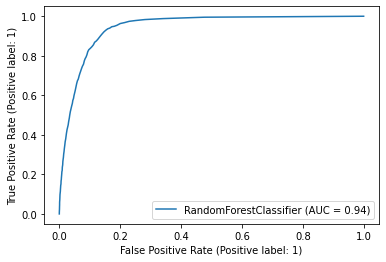

In [ ]:
metrics.plot_roc_curve(model5, X_test, y_test)
print('roc_auc_score is: ', roc_auc_score(y_test, pred5))

In [189]:
from imblearn.over_sampling import SMOTE
 
smote = SMOTE(random_state=1)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [190]:
y_train_sm.value_counts()

0    25618
1    25618
Name: subscription_new, dtype: int64

In [204]:
sam_model1 = LogisticRegression()
sam_model1.fit(X_train_sm, y_train_sm)
sam_pred1 = sam_model1.predict(X_test)
sam_acc1 = accuracy_score(sam_pred1, y_test)
print(classification_report(sam_pred1, y_test))
print(sam_acc1)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93     10156
           1       0.74      0.48      0.58      2197

    accuracy                           0.88     12353
   macro avg       0.82      0.72      0.76     12353
weighted avg       0.87      0.88      0.87     12353

0.8775196308589007


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [196]:
sam_model2 = GaussianNB()
sam_model2.fit(X_train_sm, y_train_sm)
sam_pred2 = sam_model2.predict(X_test)
sam_acc2 = accuracy_score(sam_pred2, y_test)
print(classification_report(sam_pred2, y_test))
print(sam_acc2)

              precision    recall  f1-score   support

           0       0.84      0.93      0.89      9861
           1       0.54      0.31      0.39      2492

    accuracy                           0.81     12353
   macro avg       0.69      0.62      0.64     12353
weighted avg       0.78      0.81      0.79     12353

0.8070104428074152


In [197]:
sam_model3 = KNeighborsClassifier()
sam_model3.fit(X_train_sm, y_train_sm)
sam_pred3 = sam_model3.predict(X_test)
sam_acc3 = accuracy_score(sam_pred3, y_test)
print(classification_report(sam_pred3, y_test))
print(sam_acc3)


              precision    recall  f1-score   support

           0       0.86      0.97      0.91      9670
           1       0.80      0.43      0.56      2683

    accuracy                           0.85     12353
   macro avg       0.83      0.70      0.74     12353
weighted avg       0.85      0.85      0.84     12353

0.8532340322188942


In [198]:
sam_model4= DecisionTreeClassifier(max_depth=10, min_samples_leaf=15)
sam_model4.fit(X_train_sm, y_train_sm)
sam_pred4 = sam_model4.predict(X_test)
sam_acc4 = accuracy_score(sam_pred4, y_test)
print(classification_report(sam_pred4, y_test))
print(sam_acc4)


              precision    recall  f1-score   support

           0       0.91      0.96      0.93     10325
           1       0.70      0.50      0.58      2028

    accuracy                           0.88     12353
   macro avg       0.80      0.73      0.76     12353
weighted avg       0.87      0.88      0.87     12353

0.8822957985914353


In [200]:
sam_model5 = RandomForestClassifier()
sam_model5.fit(X_train_sm, y_train_sm)
sam_pred5 = sam_model5.predict(X_test)
sam_acc5 = accuracy_score(sam_pred5, y_test)
print(classification_report(sam_pred5, y_test))
print(sam_acc5)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     11019
           1       0.57      0.61      0.59      1334

    accuracy                           0.91     12353
   macro avg       0.76      0.78      0.77     12353
weighted avg       0.91      0.91      0.91     12353

0.9083623411317089


In [203]:
acc_table1 = pd.DataFrame({'Model': ['Logistic Regression',
                                   'Naive Bayes',
                                   'KNN',
                                   'Decision Tree',
                                   'Random Forest Tree','sampled Logistic Regression',
                                   'sampled Naive Bayes',
                                   'sampled KNN',
                                   'sampled Decision Tree',
                                   'sampled Random Forest Tree'],
                         'Accuracy Score': [acc1,
                                           acc2,
                                           acc3,
                                           acc4,
                                           acc5,
										                       sam_acc1,
                                           sam_acc2,
                                           sam_acc3,
                                           sam_acc4,
                                           sam_acc5]})
acc_table1 = acc_table1.sort_values(by='Accuracy Score', ascending=False)
acc_table1

,Model,Accuracy Score
4,Random Forest Tree,0.910953
3,Decision Tree,0.909739
9,sampled Random Forest Tree,0.908362
0,Logistic Regression,0.906096
2,KNN,0.905448
5,sampled Logistic Regression,0.890067
8,sampled Decision Tree,0.882296
7,sampled KNN,0.853234
1,Naive Bayes,0.807010
6,sampled Naive Bayes,0.807010
